# Which one is a better plan?

The company  Megaline offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

Carry out a preliminary analysis of the plans based on a relatively small client selection. The data is on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.style as style 
from scipy import stats as st
%matplotlib inline


## Load data

In [2]:
# Load the data files into different DataFrames

# defining the location of the datasets
path = "https://code.s3.yandex.net/"

# reading the datasets
calls = pd.read_csv(path +'/datasets/megaline_calls.csv')
internet = pd.read_csv(path +'/datasets/megaline_internet.csv')
messages = pd.read_csv(path +'/datasets/megaline_messages.csv')
plans = pd.read_csv(path +'/datasets/megaline_plans.csv') # These are just the plans that are offered
users = pd.read_csv(path +'/datasets/megaline_users.csv')

## Prepare the data

Explore each dataframe to get an initial understanding of the data.

In [3]:
dataframes = {
                     "calls":calls, 
                     "internet":internet, 
                     "messages":messages, 
                     "plans":plans, 
                     "users":users
                    }

In [4]:
# Checking the shapes
for name, df in dataframes.items():
    print(f"{name} {df.shape}")

calls (137735, 4)
internet (104825, 4)
messages (76051, 3)
plans (2, 8)
users (500, 8)


In [5]:
# Checking info
for name, df in dataframes.items():
    print(f"{name}")
    print(" ")
    df.info()
    print(" ")

calls
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
 
internet
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
 
messages
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #  

In [6]:
# Looking at each datasets 
for name, df in dataframes.items():
    print(f"{name}")
    display(df.sample(2))
    print(' ')

calls


,id,user_id,call_date,duration
129997,1467_233,1467,2018-07-23,0.00
68031,1246_50,1246,2018-02-10,10.98


 
internet


,id,user_id,session_date,mb_used
9991,1050_414,1050,2018-08-30,387.08
101197,1482_41,1482,2018-11-16,385.00


 
messages


,id,user_id,message_date
14281,1098_300,1098,2018-11-02
62236,1392_11,1392,2018-12-14


 
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


 
users


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
440,1440,France,Barrett,49,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-04-16,surf,NaN
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31


Comments:   
* All dates should be converted to date time format  
* NaN values - churn date  
* User ids - useful for merging the datasets accordingly  

## Plans

In [7]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# Print a sample of data for plans
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


This is just the available plans. There is nothing that needs to be fixed here.

## Fix data -- All Date_time columns for all datasets

Fix obvious issues with the data given the initial observations.

In [9]:
# Date-time
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
internet["session_date"] = pd.to_datetime(internet["session_date"], format='%Y-%m-%d')
messages["message_date"] = pd.to_datetime(messages["message_date"], format='%Y-%m-%d')
users[['reg_date','churn_date']] = users[['reg_date','churn_date']].apply(pd.to_datetime, format='%Y-%m-%d')

I've fixed all the date_time format issues in the cell above.  
I will address individual fixes in the following sections as necessary.

## Users

In [10]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [11]:
# Print a sample of data for users
users.sample(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
449,1449,Boyd,Kelley,39,"Seattle-Tacoma-Bellevue, WA MSA",2018-10-04,surf,NaT
465,1465,Arianna,Morrison,73,"Pittsburgh, PA MSA",2018-06-22,ultimate,NaT
479,1479,Keesha,Burnett,44,"Riverside-San Bernardino-Ontario, CA MSA",2018-11-12,surf,NaT
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31
63,1063,Larhonda,Hartman,60,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,ultimate,NaT


* The apparent issue : NaT values in churn_date  
* The churn_date is the date the user stopped using the service. If the value is missing, the calling plan was being used when this database was extracted. For the further analysis we will need to replace 'NaN' with the string 'in use'.

In [12]:
percent_missing = users.isnull().sum() * 100 / len(users)
missing_value_df = pd.DataFrame({'column_name': users.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
user_id,user_id,0.0
first_name,first_name,0.0
last_name,last_name,0.0
age,age,0.0
city,city,0.0
reg_date,reg_date,0.0
plan,plan,0.0
churn_date,churn_date,93.2


We will replace missing values in the `churn_date` column with 'in use'. 

### Fix Data

Replace the NaT values

In [13]:
users['churn_date'] = users['churn_date'].fillna('in use')

In [14]:
users.duplicated().sum()

0

Note: it's more useful to keep all the rows of the given dataset than to drop all with missing values only retaining 7% of the data.

## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame
calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls
calls.sample(5)

,id,user_id,call_date,duration
5987,1029_151,1029,2018-10-21,3.22
27552,1105_103,1105,2018-12-31,0.00
92985,1334_353,1334,2018-04-03,18.87
133822,1485_29,1485,2018-12-30,0.00
25452,1098_126,1098,2018-09-03,0.00


These look fine. Except the 0 durations

### Fix data

Missing values

In [17]:
calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [18]:
calls.duplicated().sum()

0

In [19]:
print('Printing out the total number of missed calls:')
print(calls.loc[calls['duration'] == 0, ['duration']].count())

Printing out the total number of missed calls:
duration    26834
dtype: int64


In [20]:
print(calls['duration'].value_counts(dropna=False))

0.00     26834
8.37       102
4.02       102
3.91       101
7.61       100
         ...  
25.53        1
29.34        1
26.05        1
36.24        1
27.16        1
Name: duration, Length: 2802, dtype: int64


In [21]:
print(calls['duration'].value_counts(dropna=False, normalize = True))
print('The percentage of 0 min calls is 19.48%')


0.00     0.194823
8.37     0.000741
4.02     0.000741
3.91     0.000733
7.61     0.000726
           ...   
25.53    0.000007
29.34    0.000007
26.05    0.000007
36.24    0.000007
27.16    0.000007
Name: duration, Length: 2802, dtype: float64
The percentage of 0 min calls is 19.48%


### Enrich data

Round up the duration as per companies policy

In [22]:
calls['duration'] = np.ceil(calls['duration']) 
print('The new duration_rounded column is:')
print(calls['duration'].value_counts(dropna=False))


The new duration_rounded column is:
0.0     26834
6.0      7848
5.0      7778
7.0      7769
8.0      7718
4.0      7434
9.0      7357
3.0      6942
10.0     6918
2.0      6446
11.0     6407
1.0      5795
12.0     5750
13.0     5070
14.0     4402
15.0     3889
16.0     3011
17.0     2461
18.0     1992
19.0     1604
20.0     1243
21.0      910
22.0      671
23.0      461
24.0      324
25.0      235
26.0      157
27.0      118
28.0       62
29.0       58
30.0       27
31.0       18
32.0       13
33.0        6
36.0        3
34.0        2
38.0        1
37.0        1
Name: duration, dtype: int64


In [23]:
calls.sample(10)

,id,user_id,call_date,duration
136051,1493_213,1493,2018-09-07,10.0
64418,1232_775,1232,2018-11-25,0.0
40341,1149_29,1149,2018-10-08,14.0
34006,1126_967,1126,2018-11-11,1.0
125107,1440_623,1440,2018-11-22,17.0
4254,1017_229,1017,2018-12-27,11.0
92376,1332_32,1332,2018-11-16,12.0
47911,1173_220,1173,2018-10-22,1.0
46028,1167_111,1167,2018-07-21,11.0
1509,1008_150,1008,2018-11-03,5.0


## Messages

In [24]:
# Print the general/summary information about the messages' DataFrame
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [25]:
# Print a sample of data for messages
messages.sample(5)


,id,user_id,message_date
427,1004_97,1004,2018-08-28
54600,1346_103,1346,2018-11-17
53696,1340_222,1340,2018-10-30
42200,1273_150,1273,2018-12-06
7167,1059_37,1059,2018-08-09


Everything looks good.

### Fix data

Nulls or duplicates - none

In [26]:
messages.isnull().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [27]:
messages.duplicated().sum()

0

## Internet

In [28]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [29]:
# Print a sample of data for the internet traffic
internet.sample(5)


,id,user_id,session_date,mb_used
69025,1321_567,1321,2018-06-28,0.00
27818,1127_656,1127,2018-06-25,228.39
13738,1064_186,1064,2018-08-21,0.00
84193,1392_161,1392,2018-10-24,229.56
2531,1011_271,1011,2018-10-30,0.00


Looks fine with no apparent quality issues.

### Fix data

No nulls or duplicates

In [30]:
internet.isnull().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [31]:
internet.duplicated().sum()

0

## Study plan conditions

How do the plans works?

In [32]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Compare and contrast of the plans:  
Ultimate x20 messages.   
Ultimate x2 mb_per_month.   
Ultimate x6 minutes.   
Ultimate x3.5 monthly_pay.
Ultimate 7/10 usd/gb  
Ultimate 1/3 of usd/message  
Ultimate 1/3 of usd/minute   



Let's verify couple details about dates before we do calculations

In [33]:
# Ensure reg_date <= churn date
date_check = users.query('churn_date != "in use"')
sum(date_check['reg_date'] > date_check['churn_date'])

0

Check user activity resides between reg_date and churn_date

## Aggregate data per user

Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis.

In [34]:
# Calculate the number of calls made by each user per month and monthly minutes. Save the result.
# Extract month from call_date and then pivot table grouping by user_id and call_month.
calls['month'] = calls['call_date'].dt.month

In [35]:
# Pivot table that shows monthly minutes and number of calls
monthly_calls_minutes = calls.pivot_table(index=['user_id','month'], values='duration', aggfunc=['count','sum'])
monthly_calls_minutes = monthly_calls_minutes.reset_index()
monthly_calls_minutes.columns = ['user_id', 'month', 'number_of_calls', 'total_duration' ]
monthly_calls_minutes.head()

,user_id,month,number_of_calls,total_duration
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0


To calculate the number of text messages per month for each user,  we will extract month from the message_date column and then make a pivot table grouping by user_id and message_month.

In [36]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['month'] = messages['message_date'].dt.month
monthly_messages = messages.pivot_table(index = ['user_id', 'month'], values = 'id', aggfunc = 'count')
monthly_messages = monthly_messages.reset_index()
monthly_messages.columns = ['user_id', 'month', 'num_messages']
monthly_messages.head()

,user_id,month,num_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [37]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['month'] = internet['session_date'].dt.month
monthly_internet = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')
monthly_internet = monthly_internet.reset_index()
monthly_internet.columns = ['user_id', 'month', "mb_volume_month"]
# Round up the gb as per company policy - new column
monthly_internet['gb_volume_month'] = np.ceil((monthly_internet['mb_volume_month'].values) / 1024).astype(int)
# Check the results
monthly_internet.head()


,user_id,month,mb_volume_month,gb_volume_month
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19


Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [38]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
df_monthly = (monthly_calls_minutes
              .merge(monthly_messages, how='outer', on=['user_id','month'])
              .merge(monthly_internet, how='outer', on=['user_id','month'])
             )

In [39]:
# Checking the agg_df
df_monthly.head()

,user_id,month,number_of_calls,total_duration,num_messages,mb_volume_month,gb_volume_month
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0


In [40]:
# Add the plan information
user_plan = users[['user_id','plan','city']]
user_plan = user_plan.merge(plans, left_on='plan', right_on='plan_name')
# Merge
df_monthly = df_monthly.merge(user_plan, on = 'user_id')

df_monthly.head()

# Feedback on more elegant way of doing this portion? 

,user_id,month,number_of_calls,total_duration,num_messages,mb_volume_month,gb_volume_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf


Calculate the monthly PROFIT from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.

In [41]:
# Checking for null values
df_monthly.isnull().sum()

user_id                    0
month                      0
number_of_calls           35
total_duration            35
num_messages             487
mb_volume_month           16
gb_volume_month           16
plan                       0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

In [42]:
# Replace these with zeros as these are the users who don't use their services muchfor col in ['total_min_month','num_messages_month','mb_volume_month','gb_volume_month']:
for col in ['number_of_calls','total_duration','mb_volume_month','gb_volume_month', 'num_messages']:
    df_monthly[col] = df_monthly[col].fillna(0)

In [43]:
df_monthly.isnull().sum().sum()

0

In [44]:
df_monthly.head()

,user_id,month,number_of_calls,total_duration,num_messages,mb_volume_month,gb_volume_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf


In [45]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [46]:
def profit(row):
    fee = 0
    if row['plan'] == 'ultimate': 
        fee = 70
        if row['total_duration'] > 3000:
            fee += (row['total_duration'] - 3000) * 0.01
        if row['num_messages'] > 1000:
            fee += (row['num_messages'] - 1000) * 0.01
        if row['mb_volume_month'] > 30720:
            fee += (row['mb_volume_month'] - 30720) * 0.007    
            
    elif row['plan'] == 'surf':
        fee = 20
        if row['total_duration'] > 500:
            fee += (row['total_duration'] - 500) * 0.03
        if row['num_messages'] > 50:
            fee += (row['num_messages'] - 50) * 0.03
        if row['mb_volume_month'] > 15360:
            fee += (row['mb_volume_month'] - 15360) * 0.01    
    return round(fee, 2)

In [47]:
df_monthly['monthly_revenue'] = df_monthly.apply(profit, axis=1)

In [48]:
df_monthly.head()

,user_id,month,number_of_calls,total_duration,num_messages,mb_volume_month,gb_volume_month,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,monthly_revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,20.00
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,20.00
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,89.79
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,51.44


## Study user behaviour

### Revenue 

In [49]:
# Create separate dataframes for each plan
df_surf = df_monthly[df_monthly['plan'] == 'surf']

df_ultimate = df_monthly[df_monthly['plan'] == 'ultimate']

In [50]:
# Setting visualization style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [51]:
total_profit_month_plan = df_monthly.groupby(['plan','month'])['monthly_revenue'].sum().reset_index()


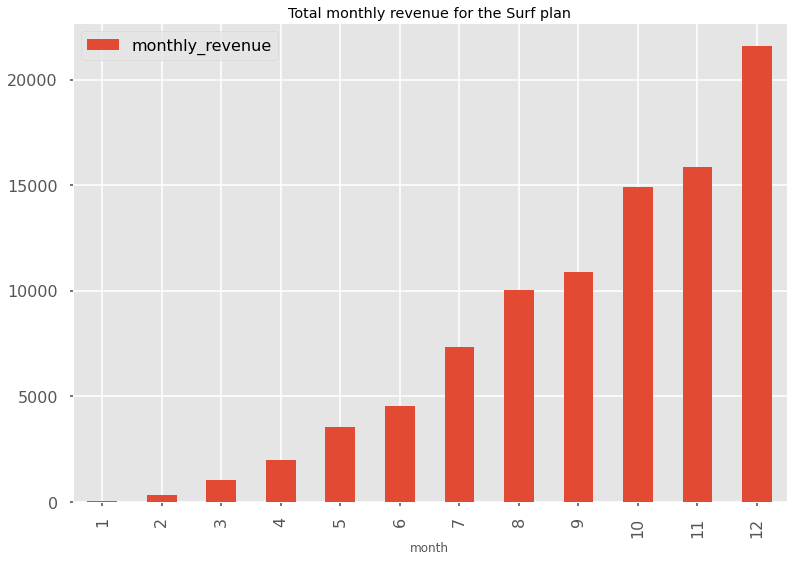

In [52]:
total_profit_month_plan[total_profit_month_plan['plan'] == 'surf'].plot(y='monthly_revenue', x='month', kind='bar')
plt.title('Total monthly revenue for the Surf plan');

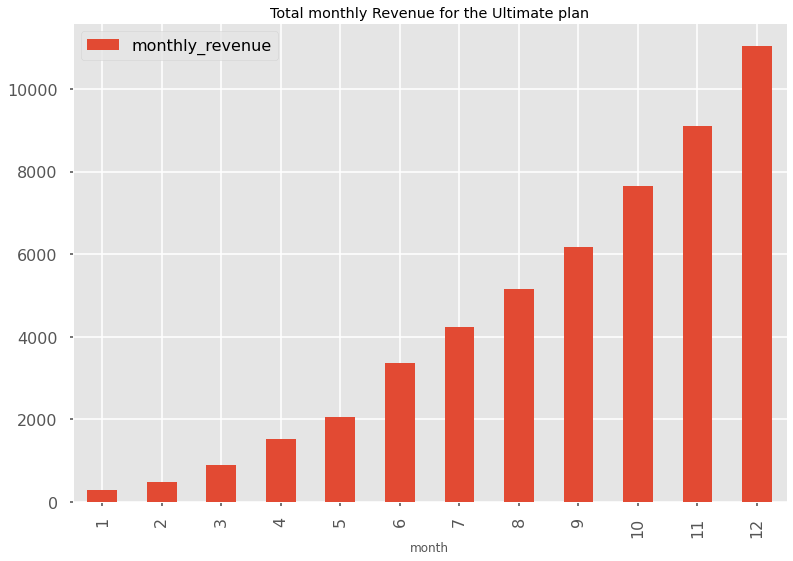

In [53]:
total_profit_month_plan[total_profit_month_plan['plan'] == 'ultimate'].plot(y='monthly_revenue', x='month', kind='bar')
plt.title('Total monthly Revenue for the Ultimate plan');

We see that in general surf is more profitable than ultimate. This difference is greatest on the later months.
For example on the month of december over 20000 for Surf vs. Over 10000 for Ultimate

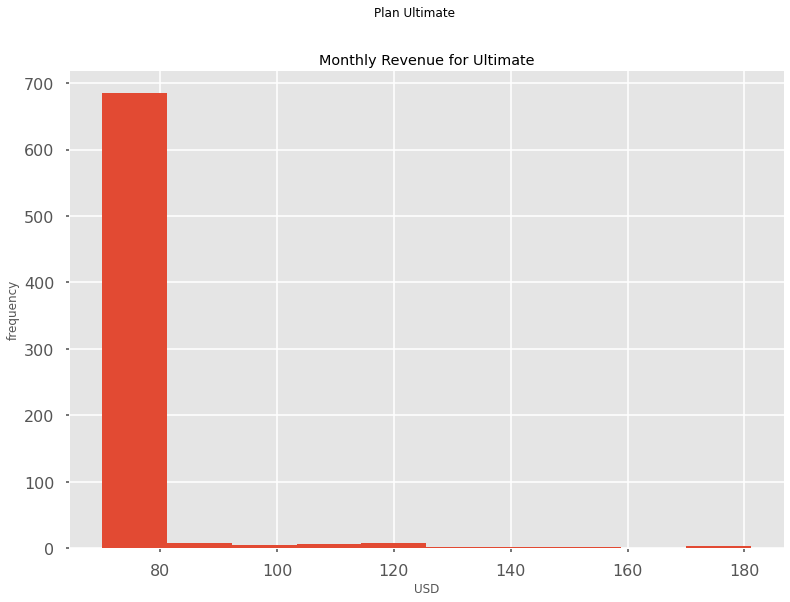

In [54]:

df_ultimate.hist('monthly_revenue')
plt.title('Monthly Revenue for Ultimate')
plt.suptitle('Plan Ultimate')
plt.xlabel('USD')
plt.ylabel('frequency');

In [55]:
print('Average monthly revenue, plan Ultimate : {:.0f}'.format(df_ultimate['monthly_revenue'].mean()))
print('Median monthly revenue, plan Ultimate :{:.0f}'.format(df_ultimate['monthly_revenue'].median()))
print('Standard deviation for monthly revenue, plan Ultimate :{:.0f}'.format(df_ultimate['monthly_revenue'].std()))

Average monthly revenue, plan Ultimate : 72
Median monthly revenue, plan Ultimate :70
Standard deviation for monthly revenue, plan Ultimate :11


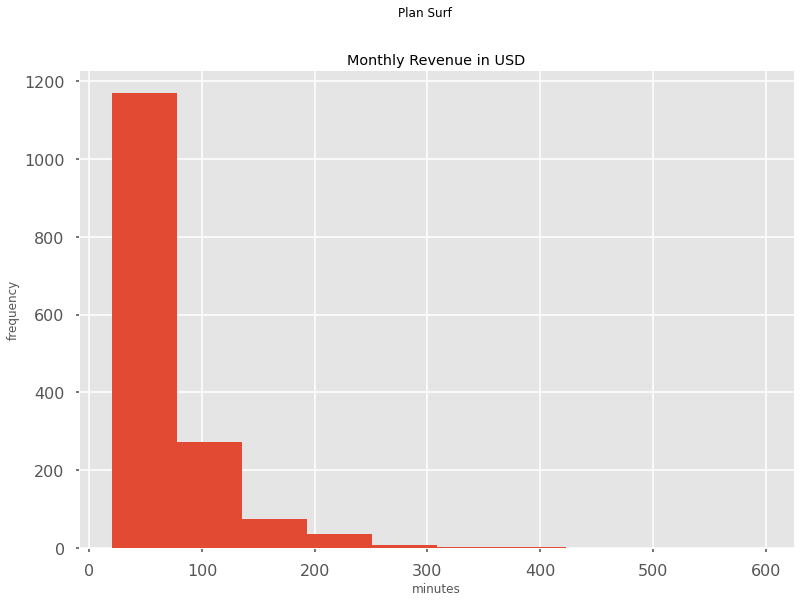

In [56]:
df_surf.hist('monthly_revenue')
plt.title('Monthly Revenue in USD')
plt.suptitle('Plan Surf')
plt.xlabel('minutes')
plt.ylabel('frequency');

In [57]:
print('Average monthly revenue, plan Surf : {:.0f}'.format(df_surf['monthly_revenue'].mean()))
print('Median monthly revenue, plan Surf :{:.0f}'.format(df_surf['monthly_revenue'].median()))
print('Standard deviation for monthly revenue, plan Surf :{:.0f}'.format(df_surf['monthly_revenue'].std()))

Average monthly revenue, plan Surf : 59
Median monthly revenue, plan Surf :38
Standard deviation for monthly revenue, plan Surf :55


The bulk of the revenue for the Ultimate plan comes from the base fee. The bulk of the revenue for Surf is more variable as customers tend to go over the limit more often since the limits are much lower. This results in more variable revenue on the surf plan that tend to be higher overall

### Calls

In [58]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
monthly_duration = df_monthly.pivot_table(
    index = 'month',
    values = 'total_duration',
    aggfunc = 'mean',
    columns = 'plan'
    
        )

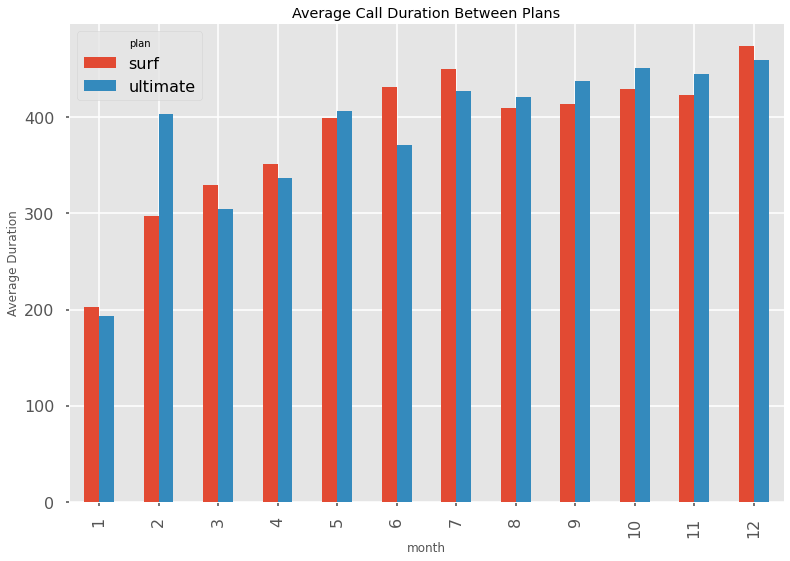

In [59]:
monthly_duration.plot(kind = 'bar')
plt.title("Average Call Duration Between Plans")
plt.ylabel("Average Duration")
plt.show()

General observation: the duration of calls seem to go up as the month go on.   
In some months surf has higher amount, and other months, ultimate has higher amount.  
February is the only month where the difference is quite noticeable. Maybe June as well.

Calls

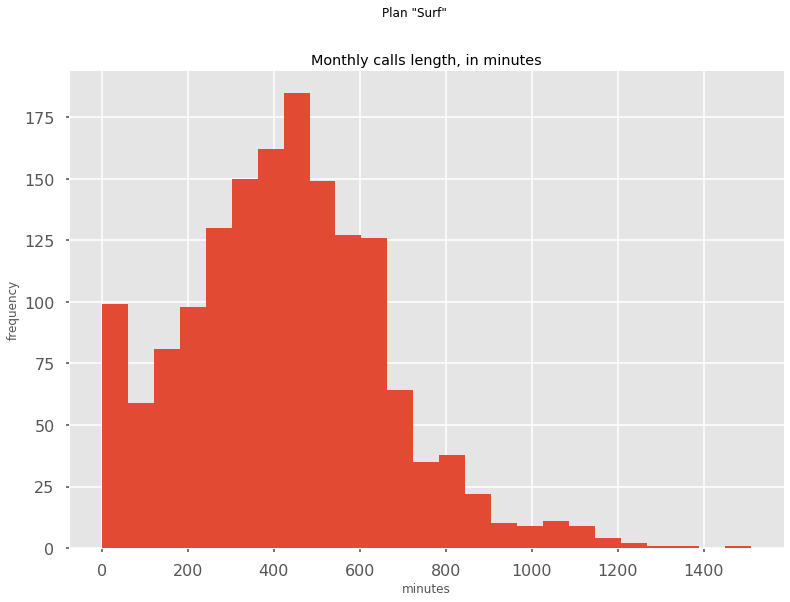

In [60]:
df_surf.hist('total_duration', bins = 25)
plt.title('Monthly calls length, in minutes')
plt.suptitle('Plan "Surf"')
plt.xlabel('minutes')
plt.ylabel('frequency');

In [61]:
print('Average monthly calls length in minutes, plan Surf : {:.0f}'.format(df_surf['total_duration'].mean()))
print('Median monthly calls length in minutes, plan Surf :{:.0f}'.format(df_surf['total_duration'].median()))
print('Standard deviation for monthly calls length in minutes, plan Surf :{:.0f}'.format(df_surf['total_duration'].std()))

Average monthly calls length in minutes, plan Surf : 429
Median monthly calls length in minutes, plan Surf :425
Standard deviation for monthly calls length in minutes, plan Surf :234


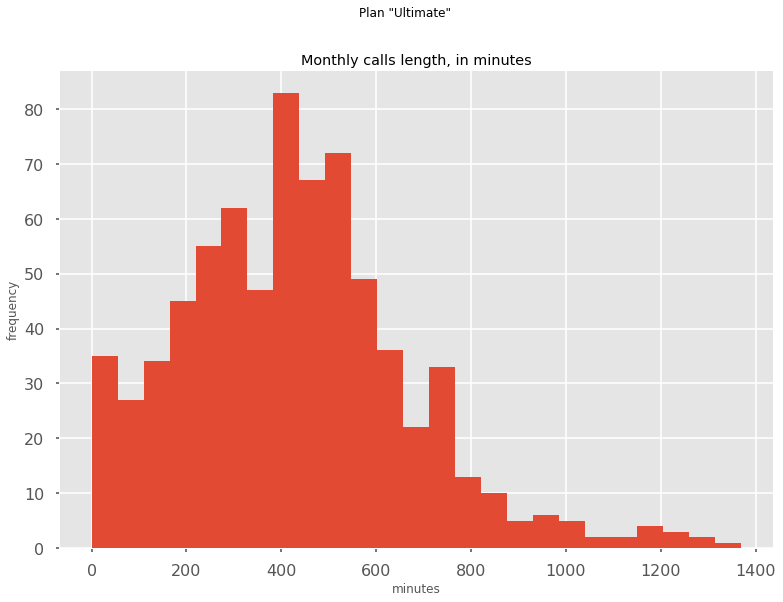

In [62]:
df_ultimate.hist('total_duration', bins = 25)
plt.title('Monthly calls length, in minutes')
plt.suptitle('Plan "Ultimate"')
plt.xlabel('minutes')
plt.ylabel('frequency');

In [63]:
print('Average monthly calls length in minutes, plan Ultimate : {:.0f}'.format(df_ultimate['total_duration'].mean()))
print('Median monthly calls length in minutes, plan Ultimate :{:.0f}'.format(df_ultimate['total_duration'].median()))
print('Standard deviation for monthly calls length in minutes, plan Ultimate :{:.0f}'.format(df_ultimate['total_duration'].std()))

Average monthly calls length in minutes, plan Ultimate : 430
Median monthly calls length in minutes, plan Ultimate :424
Standard deviation for monthly calls length in minutes, plan Ultimate :241


Average and medium monthly calls length is similar at around 430-440 minutes per month for both plans. They are distributed similarly with similar standard deviations.

In [64]:
print('People exceeded the Surf plan limit for calls: {:.0f}'.format(len(df_surf.query('total_duration > 500'))))
print('Ratio of people exceeded the Surf plan limit for calls: {:.0%}'.format(len(df_surf.query('total_duration > 500')) / len(df_surf)))

People exceeded the Surf plan limit for calls: 566
Ratio of people exceeded the Surf plan limit for calls: 36%


In [65]:
print('People exceeded the Surf plan limit for calls: {:.0f}'.format(len(df_ultimate.query('total_duration > 3000'))))
print('Ratio of people exceeded the Surf plan limit for calls: {:.0%}'.format(len(df_ultimate.query('total_duration > 3000')) / len(df_ultimate)))

People exceeded the Surf plan limit for calls: 0
Ratio of people exceeded the Surf plan limit for calls: 0%


Surf plan limit is 500 minutes. Most users stay within the limit, but 36% of them exceed this limit. On the contrary, no one is exceeding the limits for the ultimate plan. Thus, more profit is made on the surf plan. 

So far it's apparent that the money is made with the surf plan. 

### Messages

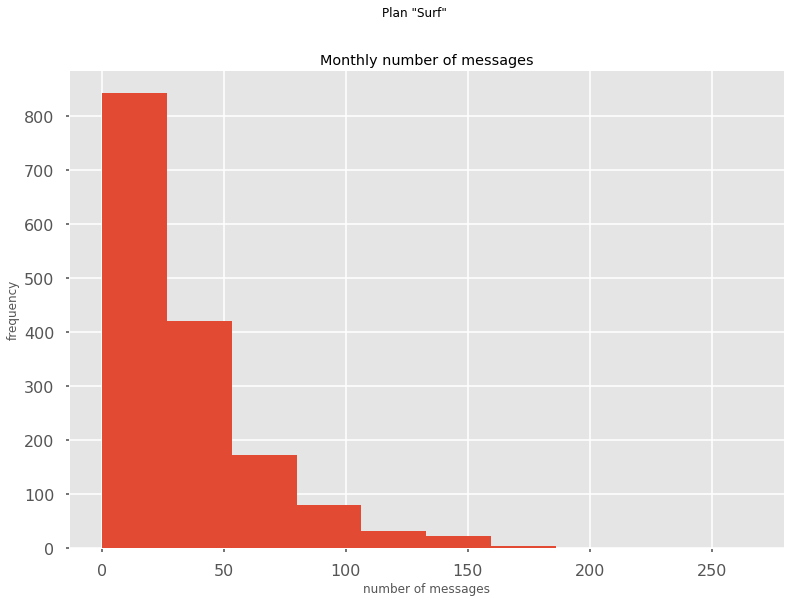

In [66]:
# Compare the number of messages users of each plan tend to send each month
df_surf.hist('num_messages')
plt.title('Monthly number of messages')
plt.suptitle('Plan "Surf"')
plt.xlabel('number of messages')
plt.ylabel('frequency');

In [67]:
print('Average monthly number of messages, plan Surf: {:.0f}'.format(df_surf['num_messages'].mean()))
print('Median monthly number of messages, plan Surf:{:.0f}'.format(df_surf['num_messages'].median()))
print('Standard deviation for monthly number of messages, plan Surf:{:.0f}'.format(df_surf['num_messages'].std()))

Average monthly number of messages, plan Surf: 31
Median monthly number of messages, plan Surf:24
Standard deviation for monthly number of messages, plan Surf:34


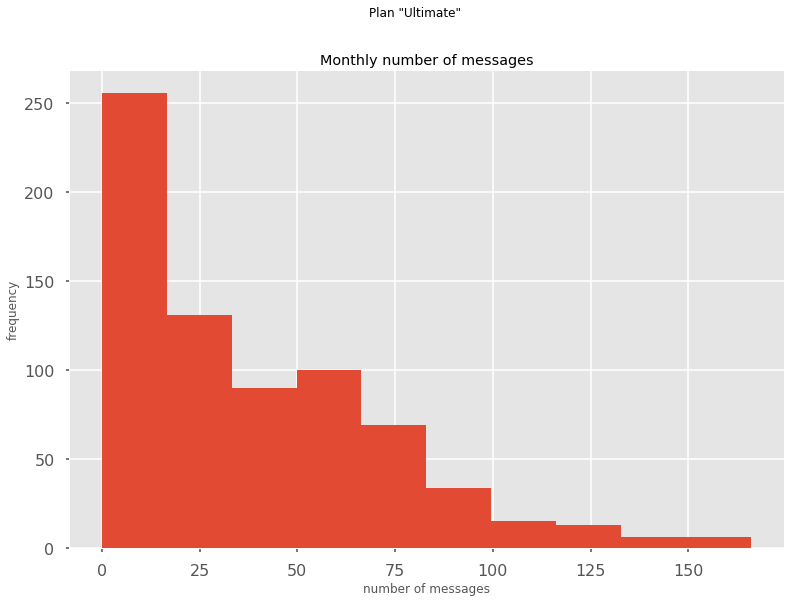

In [68]:
df_ultimate.hist('num_messages')
plt.title('Monthly number of messages')
plt.suptitle('Plan "Ultimate"')
plt.xlabel('number of messages')
plt.ylabel('frequency');

In [69]:
print('Average monthly number of messages, plan Ultimate: {:.0f}'.format(df_ultimate['num_messages'].mean()))
print('Median monthly number of messages, plan Ultimate:{:.0f}'.format(df_ultimate['num_messages'].median()))
print('Standard deviation for monthly number of messages, plan Ultimate:{:.0f}'.format(df_ultimate['num_messages'].std()))

Average monthly number of messages, plan Ultimate: 38
Median monthly number of messages, plan Ultimate:30
Standard deviation for monthly number of messages, plan Ultimate:35


The plans have similar distributions in terms of messages. However, surf plan has higher mean and median messages. This is normal because ultimate members have a higher boundary so they are free to message more without worrying about going over the limit. 

In [70]:
print('People exceeded the "Surf" plan limit for messages: {:.0f}'.format(len(df_surf.query('num_messages > 50'))))
print('Ratio of people exceeded the "Surf" plan limit for messages: {:.0%}'.format(len(df_surf.query('num_messages > 50')) / len(df_surf)))

People exceeded the "Surf" plan limit for messages: 340
Ratio of people exceeded the "Surf" plan limit for messages: 22%


In [71]:
print('People exceeded the "Surf" plan limit for messages: {:.0f}'.format(len(df_ultimate.query('num_messages > 1000'))))
print('Ratio of people exceeded the "Surf" plan limit for messages: {:.0%}'.format(len(df_ultimate.query('num_messages > 1000')) / len(df_ultimate)))

People exceeded the "Surf" plan limit for messages: 0
Ratio of people exceeded the "Surf" plan limit for messages: 0%


Similar picture here. 22% of surf plan users exceed the message limit. 0% of ultimate members exceed the limit. The money is made with the surf plan again.

### Internet

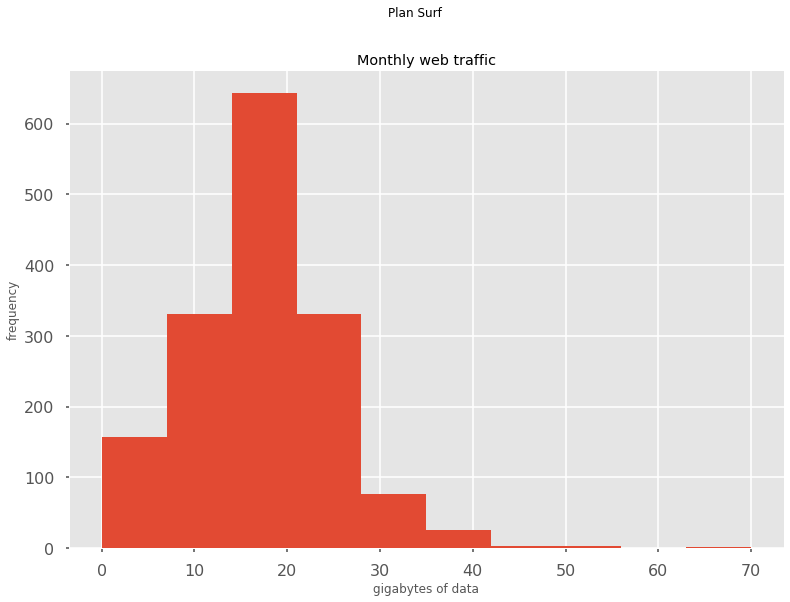

In [72]:
df_surf.hist('gb_volume_month')
plt.title('Monthly web traffic')
plt.suptitle('Plan Surf')
plt.xlabel('gigabytes of data')
plt.ylabel('frequency');

In [73]:
print('Average monthly volume of data, plan "Surf": {:.0f}'.format(df_surf['gb_volume_month'].mean()))
print('Median monthly volume of data, plan "Surf":{:.0f}'.format(df_surf['gb_volume_month'].median()))
print('Standard deviation for monthly volume of data, plan "Surf":{:.0f}'.format(df_surf['gb_volume_month'].std()))

Average monthly volume of data, plan "Surf": 17
Median monthly volume of data, plan "Surf":17
Standard deviation for monthly volume of data, plan "Surf":8


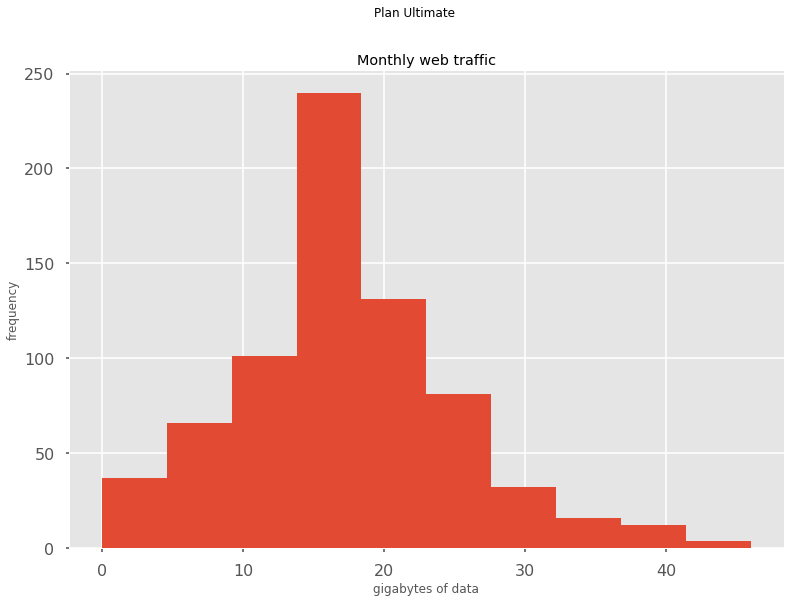

In [74]:
df_ultimate.hist('gb_volume_month')
plt.title('Monthly web traffic')
plt.suptitle('Plan Ultimate')
plt.xlabel('gigabytes of data')
plt.ylabel('frequency');

In [75]:
print('Average monthly volume of data, plan Ultimate: {:.0f}'.format(df_ultimate['gb_volume_month'].mean()))
print('Median monthly volume of data, plan Ultimate:{:.0f}'.format(df_ultimate['gb_volume_month'].median()))
print('Standard deviation for monthly volume of data, plan Ultimate:{:.0f}'.format(df_ultimate['gb_volume_month'].std()))

Average monthly volume of data, plan Ultimate: 17
Median monthly volume of data, plan Ultimate:17
Standard deviation for monthly volume of data, plan Ultimate:8


Both plans have similar distributions as well as similar means and median. Most of the rare values lie in the extreme cases over 25 gbs. 

In [76]:
print('People exceeded the "Surf" plan limit for web traffic: {:.0f}'.format(len(df_surf.query('gb_volume_month > 16'))))
print('Ratio of people exceeded the "Surf" plan limit for web traffic: {:.0%}'.format(len(df_surf.query('gb_volume_month > 16')) / len(df_surf)))

People exceeded the "Surf" plan limit for web traffic: 832
Ratio of people exceeded the "Surf" plan limit for web traffic: 53%


In [77]:
print('People exceeded the "Ultimate" plan limit for web traffic: {:.0f}'.format(len(df_ultimate.query('gb_volume_month > 31'))))
print('Ratio of people exceeded the "Ultimate" plan limit for web traffic: {:.0%}'.format(len(df_ultimate.query('gb_volume_month > 31')) / len(df_surf)))

People exceeded the "Ultimate" plan limit for web traffic: 36
Ratio of people exceeded the "Ultimate" plan limit for web traffic: 2%


Wow, we have 2% of cusomers exceeding the requirement at ultimate (it's usually 0). 55% of surf customers exceed the requirement. Surf plans limit is 16GB, only 1GB less than the average. This is why most people exceed this. Since we have the most % of people exceeding the limit here, as well as 2% at ultimate, we probably make the most profit here.

## Test statistical hypotheses

Hypothesis on the Equality(Of Average Monthly Profit) of Two Different Plans

H0: The means of two statistical populations are equal.  Average profit from users of "Surf" and "Ultimate" plans are equal.  

H1: The means of two statistical populations are not equal. Average profit from users of "Surf" and "Ultimate" plans differ.

Step 2: Set the criteria for a decision

Alpha = 0.05. 

Step 3: Compute the test statistic

In order to test our hypothesis that the means of two statistical populations are equal based on samples taken from them, we will apply the method scipy.stats.ttest_ind().



In [78]:
# Test the hypotheses
sample_1 = df_surf['monthly_revenue']
sample_2 = df_ultimate['monthly_revenue']


In [79]:
# Check for variance diff signficiant
st.levene(sample_1, sample_2)


LeveneResult(statistic=365.0227250934387, pvalue=1.267311889383148e-75)

In [80]:
# Small P-value so we set equal_var parameter to FALSE

In [81]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
                        sample_1, 
                        sample_2, 
                        equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  1.437154952455543e-20
We reject the null hypothesis


We have a very small p-value. This hypothesis would be rejected even if alpha was set to 0.01. The null states that these 2 plan profits are the same. We reject this, thus we say that the difference is significantly different.

Do a hypothesis test that states mean surf profit > mean ultimate profit.


H0: Mean surf profit = mean ultimate profit

H1: Mean surf profit > mean ultimate profit

We will reject the null hypothesis if our p-value is < alpha (0.05)

In [82]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
                        sample_1, 
                        sample_2,
                        equal_var=False,
                        alternative='greater')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  1.0
We retain the null hypothesis


We reject the null hypothesis once again. The surf plan's monthly mean profit is statistically significantly greater than that of the ultimate plan. 

In [83]:
# Test the hypotheses
# Create 2 dataframe with the city conditions 
ny_nj_users = df_monthly[df_monthly['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']
other_regions_users = df_monthly[df_monthly['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']

Step 1: the null and alternative hypotheses

H0: The means of two statistical populations are equal. Average profit from users in NY-NJ area and users in other regions is the same.

H1: The means of two statistical populations are not equal.  Average profit from users in NY-NJ area and users in other regions differs.

Step 2: Set the criteria for a decision

Alpha = 0.05

Step 3: Compute the test statistic

In order to test our new hypothesis we will again apply the method scipy.stats.ttest_ind() but first let's test whether variances of these two populations are similar.

In [84]:
sample_ny = ny_nj_users['monthly_revenue']
sample_other = other_regions_users['monthly_revenue']

st.levene(sample_ny, sample_other)

LeveneResult(statistic=1.4457527015936522, pvalue=0.22933494946787555)

p-value < 0.05 so we set the equal-var parameter to false. 

In [85]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
                        sample_ny, 
                        sample_other, 
                        equal_var=False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  0.024618308103497293
We reject the null hypothesis


We reject the null hypothesis because p-value < 0.05. This means the difference of average profit between these regions is significant.   

Let's do a one tailed test to see if NY is greater or less than other regions.

H0: The mean profits between NY and other regions are same
H1: THe mean profits of NY < mean profits other regions

In [86]:
alpha = .05 # critical statistical significance level
                        # if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(
                        sample_ny, 
                        sample_other,
                        equal_var=False,
                        alternative='less')

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  0.012309154051748646
We reject the null hypothesis


We fail to reject the null hypothesis since p-value > alpha. Meaning that the mean profit of NY is not less than the mean profits of other regions

## General conclusion

We've analyzed the difference of profitibility between SURF and ULTIMATE plans.

We found that the SURF plan is mostly profitable throughout the year with a tendency of being more and more profit-making towards the end of the year. In contrast, the ULTIMATE plan is mostly not profitable during the year, with the opposite tendency of being even more costly by the end of the year.

Despite distributions of calls, messages, internet, being similar. We saw that SURF customers were more likely to exceed the minimum requirements whereas ULTIMATE customers only exceeded in the internet department (only 2%).

Next step was statistical hypotheses testing. We tested two hypotheses:

The average profit from users of Ultimate and Surf plans differs;
The average profit from users in NY-NJ area is different from that of the users from other regions.
For the first case we saw that Surf plans average monthly profit is statistically different (greater) that of the ULTIMATE Plan's average monthly profit

